# Chapter 10 - Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import gridspec

from tqdm.notebook import tqdm_notebook

import warnings
warnings.simplefilter('ignore')

plt.style.use('ggplot')

colors= [c['color'] for c in plt.rcParams['axes.prop_cycle']]

pd.set_option('display.max_colwidth',None)

## Principle Component Analysis

When faced with a large set of correlated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set.


### What Are Principle Components?

The idea is that given a dataset of _n_ observations and _p_ dimensions, generally not all of these dimensions are equally interesting. That is, some dimensions contain more variability in the observations than others. PCA seeks a small(er) number of dimensions that contains as much variability as possible. Each of these dimensions, or _principle components_ found by PCA are a linear combination of the _p_ features. 

The first principle component of a set of features $X_1, X_2, \ldots, X_p$ is the normalized linear combination of the features:

$$
Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \ldots + \phi_{p1}X_p
$$

that has the largest variance. In other words, the first principle component is found by solving for $\phi_{11}, \ldots ,\phi_{p1}$ such that is maximizes the sample variance of the n samples in the dataset. Each sample gets a _score_:

$$
z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + \ldots + \phi_{p1}x_{ip}
$$

The elements $\phi_{11}, \ldots ,\phi_{p1}$ are called the _loadings_ of the principle component. They are normalized such that their sum of squares is equal to 1, or $\sum_{j=1}^p\phi_{j1}^2 = 1$. 


The second principle component is the linear combination of $X_1, X_2, \ldots, X_p$ that has a maximal various of out all linear combinations that are _uncorrelated with $Z_1$_. It turns out that by constraining $Z_2$ to be uncorrelated with $Z_1$ is equivalent to constraining the direction of 
$\phi_2$ to be orthogonal to the direction $\phi_1$. 

## Key Take-aways

* Principle components are linear combinations of the original features
* The principle components are ordered by the amount of variance it captures.
* The first principle component loading vector defines a direction along which the feature space varies the most.
* Each feature needs to have a zero-mean, and typically also unit-variance before doing PCA

### Figure 10.1

In [17]:
usarrest = pd.read_csv('../data/usarrests.csv', index_col=0)
usarrest.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler(with_mean=True, with_std=True)

X = pd.DataFrame(scaler.fit_transform(usarrest), columns=usarrest.columns, index=usarrest.index)

n_components = 2
pca = PCA(n_components=n_components, random_state=0)

X_pca = pca.fit_transform(X)

# min-max scale pca
X_pca = MinMaxScaler((-1, 1)).fit_transform(X_pca)

X_pca = pd.DataFrame(X_pca, columns=[f'component {i+1}' for i in range(n_components)], index=usarrest.index)

X_pca.head()

,component 1,component 2
Alabama,0.324767,0.364116
Alaska,0.646009,0.333755
Arizona,0.583739,-0.584031
Arkansas,-0.050565,0.357257
California,0.837122,-0.986113


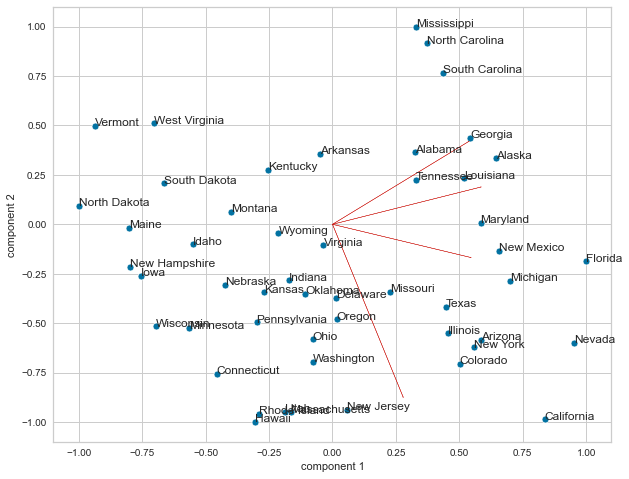

In [72]:
fig, ax = plt.subplots(figsize=(10,8))

sns.scatterplot(data=X_pca, x='component 1', y='component 2')

for state, (x,y) in X_pca[['component 1', 'component 2']].iterrows():
    ax.text(x, y, state)

loading_vecs = pca.components_
for n in range(loading_vecs.shape[1]):
    coef = loading_vecs[0]
    feat = X.columns[n]
    ax.arrow(0, 0, coef[n], coef[n], color='r')
    ax.text(l)

plt.show()

#### Using other libraries

In [45]:
from pca import pca
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)

X = pd.DataFrame(scaler.fit_transform(usarrest), columns=usarrest.columns, index=usarrest.index)

n_components = 2
model = pca(n_components=n_components, random_state=0)

results = model.fit_transform(X)
# X_pca = pd.DataFrame(X_pca, columns=[f'component {i+1}' for i in range(n_components)], index=usarrest.index)
X_pca = results['PC']
X_pca.head()

[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Processing dataframe..
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..


,PC1,PC2
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


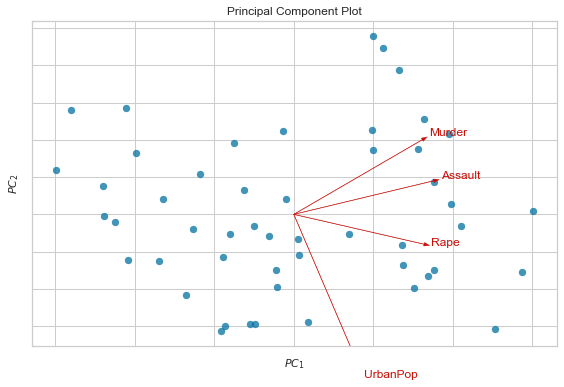

In [61]:
from yellowbrick.features import PCA

pca = PCA(scale=True, proj_features=True, projection=2, )
pca.fit_transform(usarrest)
pca.show()